<a href="https://colab.research.google.com/github/vicky43142/Durgam-Vivek/blob/main/GooglePlayStore_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Google Play Store Data Analysis
This notebook analyzes app data from the Google Play Store dataset.

In [ ]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv('googleplaystore.csv')



In [ ]:
# Step 3: Display Top 5 Genres
top_genres = df['Genres'].value_counts().head(5)
print("Top 5 Genres:\n")
print(top_genres)

Top 5 Genres:

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64


C:\Users\vivek\AppData\Local\Temp\ipykernel_11532\3943354930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


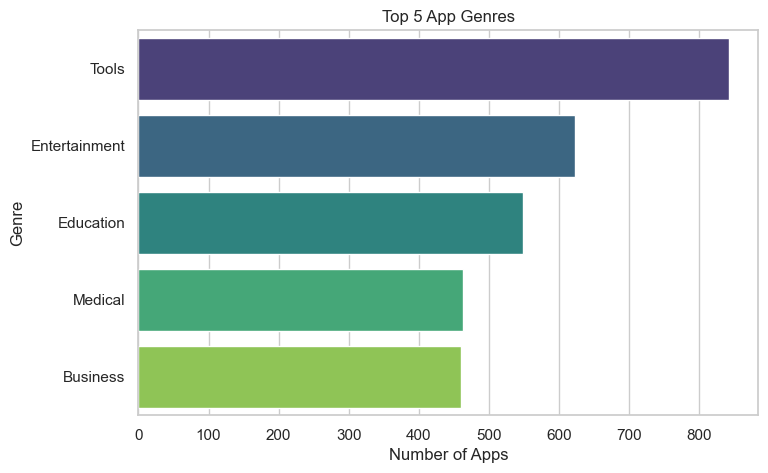

In [ ]:
# Step 4: Plot Top 5 Genres
plt.figure(figsize=(8, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 5 App Genres")
plt.xlabel("Number of Apps")
plt.ylabel("Genre")
plt.show()

In [ ]:
# Step 5: Clean 'Installs' column
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [ ]:
# Step 6: Filter rows from top genres
top_genre_names = top_genres.index.tolist()
filtered_df = df[df['Genres'].isin(top_genre_names)]

In [ ]:
# Step 7: Calculate and display average rating per genre
avg_rating_by_genre = filtered_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings for Top Genres:\n")
print(avg_rating_by_genre)


Average Ratings for Top Genres:

Genres
Education        4.302564
Medical          4.189143
Business         4.121452
Entertainment    4.089493
Tools            4.046794
Name: Rating, dtype: float64


C:\Users\vivek\AppData\Local\Temp\ipykernel_11532\199678625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='magma')


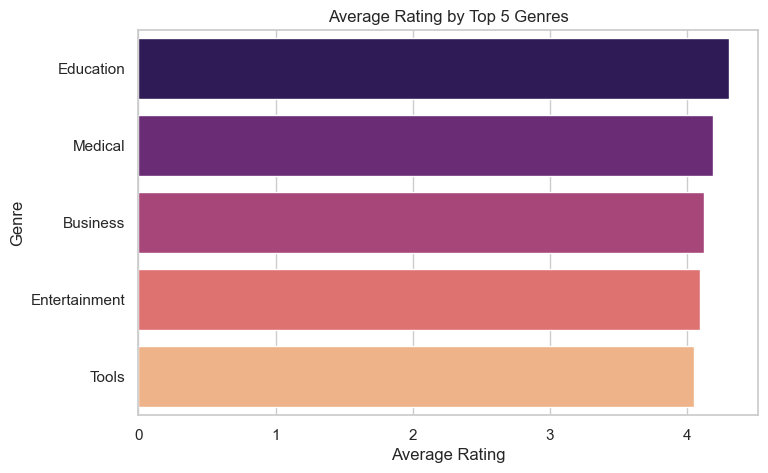

In [ ]:
# Step 8: Plot average rating per genre
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index, palette='magma')
plt.title("Average Rating by Top 5 Genres")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

In [ ]:
# Step 9: Remove missing values in Installs and Rating
df_clean = df.dropna(subset=['Installs', 'Rating'])

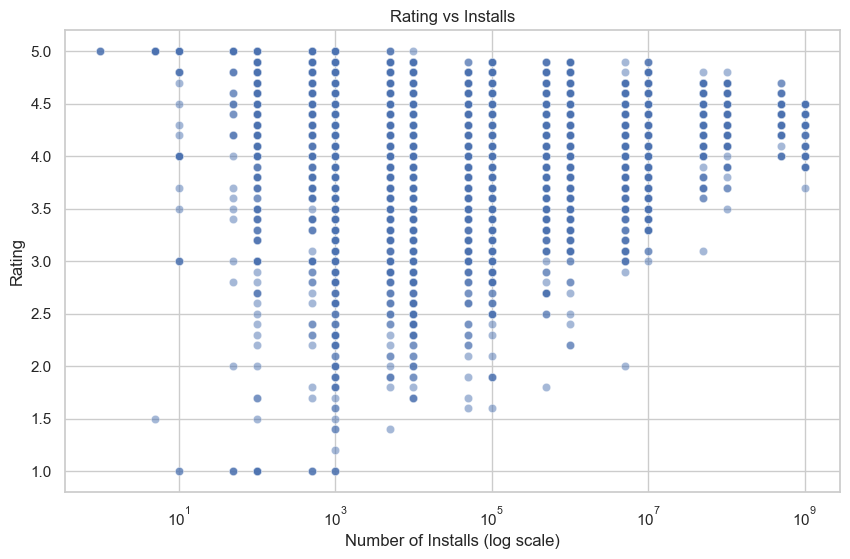

In [ ]:
# Step 10: Plot Rating vs Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Installs', y='Rating', alpha=0.5)
plt.xscale('log')
plt.title("Rating vs Installs")
plt.xlabel("Number of Installs (log scale)")
plt.ylabel("Rating")
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_11532\827119535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')
C:\Users\vivek\AppData\Local\Temp\ipykernel_11532\827119535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].astype(str).str.replace('$', '', regex=False)
C:\Users\vivek\AppData\Local\Temp\ipykernel_11532\827119535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

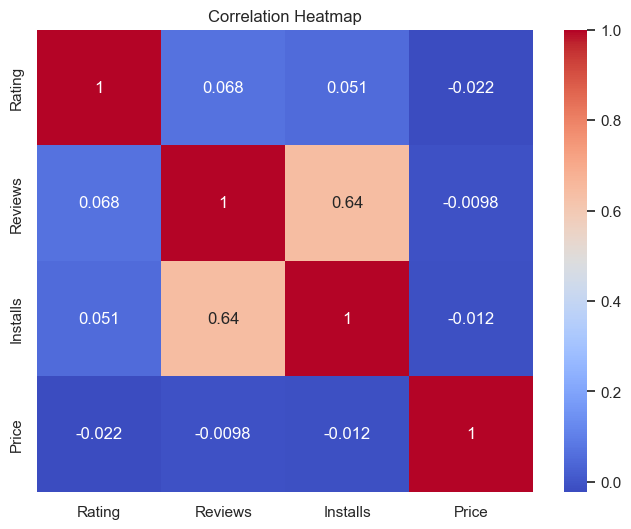

In [ ]:
# Step 11: Correlation Heatmap
# Convert Reviews and Price
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')
df_clean['Price'] = df_clean['Price'].astype(str).str.replace('$', '', regex=False)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Select numeric columns
numeric_df = df_clean[['Rating', 'Reviews', 'Installs', 'Price']]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()